In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 1 QDA
(a)

In [15]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: group the points into two arrays pts0, pts1 according to the labels
pts0 = pts[labels==0]; pts1 = pts[labels==1]
# TODO: compute the mean and standard deviations for each class (and print them)
mean0 = np.mean(pts0); std0 = np.std(pts0)
mean1 = np.mean(pts1); std1 = np.std(pts1)
print('mu0 =', f'{round(mean0, 2)}, ' ,'s0 = ', f'{round(std0, 2)}')
print('mu1 =', f'{round(mean1, 2)}, ', 's1 = ', f'{round(std1, 2)}')

mu0 = -0.71,  s0 =  1.65
mu1 = 0.54,  s1 =  1.28


(b) Assuming equal priors, $p(y=1) = p(y=0) =: p(y)$, we can calculate the posterior $p(y=1|x) = \frac{p(x|y=1) p(y)}{p(x|y=0)p(y) + p(x|y=1)p(y)} = \frac{p(x|y=1)}{p(x|y=0) + p(x|y=1)}$

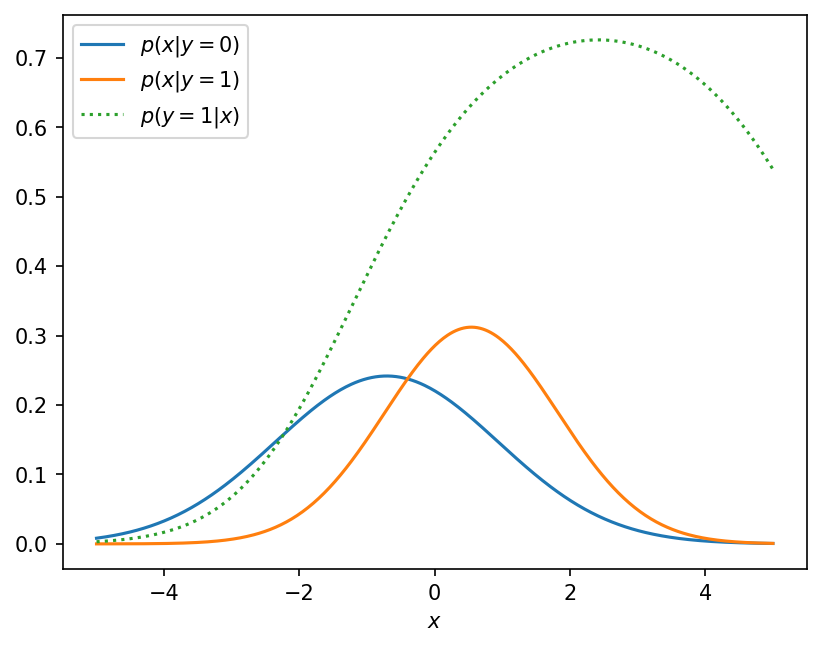

In [32]:
from scipy.stats import norm

# TODO: evaluate the Gaussian class densities in a range from -5 to 5
x = np.linspace(-5,5, 500)
norm0 = norm(loc = mean0, scale = std0); norm1 = norm(loc = mean1, scale = std1)
pdf0 = norm0.pdf(x); pdf1 = norm1.pdf(x)
# TODO: evaulate the posterior p(y=1|x)
posterior1 = pdf1/(pdf0 + pdf1)
# TODO: plot the class densities and the posterior p(y=1|x). (Don't forget title, axis labels, legend)
plt.figure(dpi=150)
plt.plot(x, pdf0, label = '$p(x|y=0)$')
plt.plot(x, pdf1, label='$p(x|y=1)$')
plt.plot(x, posterior1, label = '$p(y=1|x)$', linestyle='dotted')
plt.xlabel('$x$')
plt.legend(loc='best')

We can see that the likelihood for class 1 is greater for higher values of $x$. As we can already imagine from the formula, the posterior becomes very large when the likelihood of class 0 decreases while the likelihood for class 1 is still increasing or at least comparatively big. This makes sense when looking at the likelihoods: For greater $x$ it seems more likely that the data is described by the parameters of class 1. 

## 3 Trees and Random Forests
(a)

In [86]:
class trees:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y
        self.N = x.shape[0]
        self.split_no = 2

    def gen_splits(self, stop) -> list:
        indexes = np.argsort(self.x)
        x_sort = self.x[indexes]
        y_sort = self.y[indexes]
        splits = [(x_sort[:stop], y_sort[:stop]), (x_sort[stop:], y_sort[stop:])]
        return splits
    
    def gini(self, splits:list) -> float:
        impurities = np.zeros(self.split_no)
        for i, split in enumerate(splits):
            y = split[1]
            p0 = (y[y==0].reshape(-1).shape[0])/self.N # reshape in case len = 1
            p1 = (y[y==1].reshape(-1).shape[0])/self.N
            impurities[i] = p0 * (1-p0) + p1 * (1-p1)
        return np.sum(impurities)
    
    def entropy(self, splits:list) -> float:
        entropies = np.zeros(self.split_no)
        for i, split in enumerate(splits):
            y = split[1]
            p0 = (y[y==0].reshape(-1).shape[0])/self.N
            p1 = (y[y==1].reshape(-1).shape[0])/self.N
            entropies[i] = -p0 * np.log(p0+10e-15) - p1 * np.log(p1+10e-15)
        return np.sum(entropies)
    
    def misclass(self, splits:list) -> float:
        misclasses = np.zeros(self.split_no)
        for i, split in enumerate(splits):
            y = split[1]
            p0 = (y[y==0].reshape(-1).shape[0])/self.N
            p1 = (y[y==1].reshape(-1).shape[0])/self.N
            misclasses[i] = 1 - max(p0, p1)
        return np.sum(misclasses)

In [87]:
binary_tree = trees(pts, labels)
ginis, entropies, misclasses = np.zeros((3, len(pts)))
for i in range(1, len(pts)):
    splits = binary_tree.gen_splits(i)
    ginis[i] = binary_tree.gini(splits)
    entropies[i] = binary_tree.entropy(splits)
    misclasses[i] = binary_tree.misclass(splits)

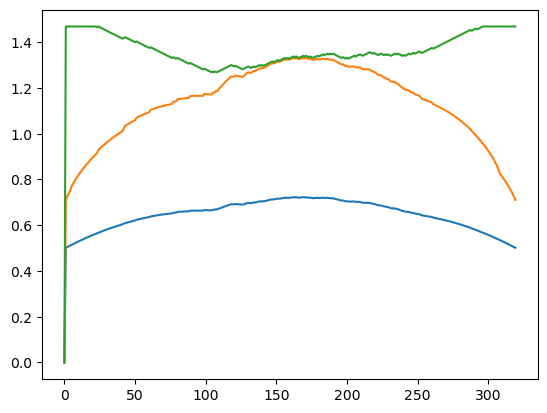

In [91]:
plt.plot(ginis)
plt.plot(entropies)
plt.plot(misclasses)

In [71]:
def gini(splits:list):
    N = np.hstack(splits).shape[0]
    split_no = len(splits)
    impurity = np.zeros(split_no)
    for i, split in enumerate(splits):
        p1 = split.reshape(-1).shape[0] / N
        impurity[i] = p * (1-p)
    return np.sum(impurity)

def entropy(splits:list):
    N = np.hstack(splits).shape[0]
    split_no = len(splits)
    entropies = np.zeros(split_no)
    for i, split in enumerate(splits):
        p = split.reshape(-1).shape[0] / N
        entropies[i] = - p * np.log(p)
    return np.sum(entropies)

def misclass(splits:list):
    N = np.hstack(splits).shape[0]
    split_no = len(splits)
    misclasses = np.zeros(split_no) 
    for i, split in enumerate(splits):
        p = split.reshape(-1).shape[0] / N
        misclasses[i] = - p * np.log(p)
    return np.sum(misclasses)
   

In [74]:
# len((*[pts_sorted[:-1], pts_sorted[-1]])
misclass([pts_sorted[:-1], pts_sorted[-1]])


0.021146115205130343

In [33]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them
pts_sorted = np.sort(pts)
#print(pts, '\n', pts_sorted)
# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
    
# TODO: Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)


[ 0.02102905  0.75063676 -0.45141196 -0.58581671 -0.98018462  0.24727613
  0.09701208  1.68461723  2.11562787  2.10925932 -1.03309081 -1.15571119
 -0.53215754 -0.59153113 -1.5425679  -1.45993333 -0.18402495  1.94176784
  2.61781414  0.82627724 -4.65357188 -1.20465522 -1.68471998 -1.36387441
 -2.48780604 -1.93177543 -1.81224147  1.49383315 -1.3286902   0.77170014
 -0.15255893 -0.89461163 -1.68495476  2.14311104 -0.04315871 -1.17768808
 -1.88451947  0.86576752 -1.20583879 -1.45214029  2.08168512  1.42775196
 -1.66758227  1.93836509  0.94115543 -0.51280301  2.10460975  0.41171273
  2.56481027 -1.00432448  1.82074538 -1.42911506  0.15211861 -1.18189122
 -1.03225954 -1.94299724  1.51108453 -0.87472799 -0.31311667 -2.00494237
 -3.14015405  0.72199975  2.03425544 -1.86782162 -1.37154825 -1.76713567
  0.028547   -2.04443925  1.49242144 -0.85921226 -2.01135129 -1.6556911
 -0.58095098 -0.37990365 -0.83475915  1.69973524 -0.76195893 -0.29189379
 -1.32418481 -1.54352831 -1.08179172  1.84754634  0.

(b)

In [ ]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of hyperparameters as specified on the sheet
#       and evaluate the performances on the validation set.


In [ ]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set


## 4 Beta Distribution

In [ ]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# split the data into the classes
pts1 = pts[labels==0]
pts2 = pts[labels==1]

# plot the data
fig, ax = plt.subplots(figsize=(15, 1))
plt.scatter(pts1, np.ones_like(pts1), label='pts1', marker='|', alpha=0.3)
plt.scatter(pts2, np.zeros_like(pts2), label='pts2', marker='|', alpha=0.3)
plt.legend()
plt.yticks([])
plt.ylim(-0.2, 1.2)
plt.show()

In [ ]:
from scipy.special import gamma, gammaln

def beta_pdf(x, a, b):
    """Probability density function for the Beta distribution with parameters a and b. Works verctorized over all inputs"""
#     return (gamma(a+b) * x**(a-1) * (1-x)**(b-1)) / gamma(a) / gamma(b)  # breaks down for larger a, b
    return np.exp(gammaln(a+b) - gammaln(a) - gammaln(b) + np.log(x)*(a-1) + np.log(1-x)*(b-1))  # works for larger a, b

eps = 1e-6
x = np.linspace(eps, 1-eps, 1000, endpoint=True)
for a, b in ((0.1, 0.1), (0.1, 1), (1, 1), (2, 2), (10, 10), (5, 15)):
    plt.plot(x, beta_pdf(x, a, b), label=f'{a=}, {b=}')
plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.title('Beta distribution for different parameters')
plt.show()

In [ ]:

def count_points_within_distance(x, pts, r):
    """
    Count number of points among pts within a distance r of query points x (in 1D).
    
    Parameters
    ----------
    x : np.ndarray
        Query points of shape (M).
    pts : np.ndarray
        Points to be searched, shape (N).
    r : float
        radius.
        
    Returns
    -------
    np.ndarray
        Array of counts of shape (M)
        
    """
    # TODO: sort the points
    
    # TODO: use np.searchsorted on the interval boundaries 
    #       to find number of points inside each interval (don't use loops!)
    
    return counts

# use a flat prior
prior_a, prior_b = 1, 1  

# define value range
vmin, vmax = -5, 5

# set the radius
r = .3

# TODO: sample x and mu as described in the exercise

# TODO: use count_points_within_distance to calculate the counts

# TODO (optional): plot the counts vs x

# TODO: evaluate the posterior to get an image (use broadcasting, no loops needed!)

# TODO: plot the posterior as an image, specify the correct origin and extent


(e) Bonus